# Making Data Management Decisions

##### Preview

In this assignment you will find three data managed variables, provided from NESARC codebook, as frequency distributions. First one is the variable [S1Q2K]BIOLOGICAL OR ADOPTIVE PARENT DIE BEFORE RESPONDENT WAS 18 and i've deleted the row unknow,and set to nan the row BL.Then my second variable is [CONSUMER] indicates wheter a person is actually a aalchol drinker or not.the third variable is [S4AQ20B] and is talking about the necessity of drink alchool to feel better.
The last variable ['S2AQ8D'] is related about the quantity of alcohol the past in the past 12 months.I'll start separete the youngests of 18 and then divide it in two subsets.
   

In [119]:
import pandas 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pandas.read_csv('nesarc.csv')

df.head()

,Unnamed: 0,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,...,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms
0,0,5,,1,4007,403,3928.613505,14,8,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
1,1,5,0.0014,2,6045,604,3638.691845,12,1,2002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
2,2,5,,3,12042,1218,5779.032025,23,11,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
3,3,5,,4,17099,1704,1071.754303,9,9,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
4,4,2,,5,17099,1704,4986.952377,18,10,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan


In [120]:
pandas.set_option('display.float_format' , lambda x:'%f'%x)
df.describe()

,Unnamed: 0,ETHRACE2A,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms
count,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,8185.000000,...,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,8184.000000,261.000000
mean,4092.000000,2.040073,4093.000000,29636.264997,2958.929016,4942.638069,16.225779,8.713256,2001.129872,2.639829,...,0.004765,0.000611,0.017351,0.015152,0.084800,0.000489,0.005254,0.000000,0.000489,2.421456
std,2362.950310,1.538717,2362.950310,15772.518085,1568.717690,3347.099407,8.738690,2.993762,0.336183,0.891212,...,0.088998,0.024711,0.164538,0.169147,0.357382,0.034954,0.115294,0.000000,0.027074,1.786315
min,0.000000,1.000000,1.000000,1001.000000,101.000000,398.855701,1.000000,1.000000,2001.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2046.000000,1.000000,2047.000000,13097.000000,1308.000000,2717.532245,9.000000,8.000000,2001.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4092.000000,1.000000,4093.000000,31098.000000,3109.000000,3827.362169,16.000000,9.000000,2001.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,6138.000000,2.000000,6139.000000,42095.000000,4216.000000,6986.299036,24.000000,11.000000,2001.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,8184.000000,5.000000,8185.000000,56017.000000,5605.000000,37648.529080,31.000000,12.000000,2002.000000,4.000000,...,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,2.000000,6.000000


In [121]:
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [122]:
df1=df[(df['AGE']==18)]
df1

,Unnamed: 0,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,...,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,NDSymptoms
3,3,5,NaN,4,17099,1704,1071.754303,9,9,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
9,9,5,0.1565,10,4013,404,3008.554718,16,8,2001,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
36,36,5,NaN,37,36094,3616,2292.549993,17,1,2002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
153,153,4,NaN,154,6098,624,6853.268126,28,9,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
156,156,5,NaN,157,36094,3616,1586.297176,29,9,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,7914,1,0.6544,7915,39091,3913,7850.316750,30,12,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7950,7950,3,0.0025,7951,34011,3407,9030.603521,28,8,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
8032,8032,1,NaN,8033,13097,1306,8657.814391,17,10,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
8086,8086,1,0.0744,8087,46001,4601,3791.054404,30,8,2001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [123]:
df1.dtypes

Unnamed: 0        int64
ETHRACE2A         int64
ETOTLCA2         object
IDNUM             int64
PSU               int64
                 ...   
HER12ABDEP      float64
HERP12ABDEP     float64
OTHB12ABDEP     float64
OTHBP12ABDEP    float64
NDSymptoms      float64
Length: 3010, dtype: object

In [124]:
#DRANK ALCOHOL TO IMPROVE MOOD IN LAST 12 MONTHS S4A
#CONSUMER DRINKING STATUS consumer
df1=df1[['S1Q2K','SEX','S4AQ20B','CONSUMER','S2AQ8D','S10Q1B3']]  
 
df1

,S1Q2K,SEX,S4AQ20B,CONSUMER,S2AQ8D,S10Q1B3
3,2,1,NaN,2,NaN,2.000000
9,2,2,NaN,1,10,2.000000
36,2,1,NaN,3,NaN,2.000000
153,2,2,NaN,3,NaN,2.000000
156,2,1,NaN,3,NaN,2.000000
...,...,...,...,...,...,...
7914,2,2,NaN,1,9,2.000000
7950,2,1,NaN,1,10,2.000000
8032,2,1,NaN,3,NaN,2.000000
8086,2,1,NaN,1,9,2.000000


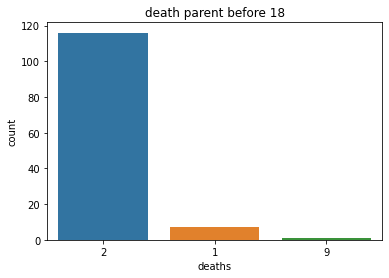

In [125]:
sns.countplot(x='S1Q2K', data=df1)
plt.xlabel('deaths')
plt.title('death parent before 18')
plt.show()

In [126]:
#unique values
df1['S1Q2K'].unique()

array(['2', nan, '1', '9'], dtype=object)

In [127]:
#recode some columns with different name variables
df1=df1.rename(columns={'S4AQ20B': 'ALC4MOOD', 'S2AQ8D': 'ALCL_12MO','S10Q1B3':'TROUBLS'})

In [128]:
#remap the indicators of ALCL_12MO QUANTITY
df1["ALCL_12MO"].replace({"10": "4", "9": "4",'8':'4','7':'4','6':'3','5':'3','4':'2','3':'2','2':'1','1':'1'}, inplace=True)

In [129]:
df1['S1Q2K'] = pandas.to_numeric(df1['S1Q2K'], errors='coerce')
df1 = df1.dropna(subset=['S1Q2K'])
df1['S1Q2K'] = df1['S1Q2K'].astype(int)
df1['ALC4MOOD'] = df1['ALC4MOOD'].astype(float)
df1['ALCL_12MO'] = df1['ALCL_12MO'].astype(float)

In [130]:
df1['S1Q2K'].replace([9], np.nan, inplace=True)
df1['S1Q2K'].replace([0.000000], np.nan, inplace=True)
df1['ALCL_12MO'].replace([99],np.nan, inplace=True)
df1['ALC4MOOD'].replace([0.000000], np.nan, inplace=True)


In [131]:
#dead parewnts before 18
subset1 = df1[(df1['S1Q2K'] ==1)]
subset1

,S1Q2K,SEX,ALC4MOOD,CONSUMER,ALCL_12MO,TROUBLS
945,1.000000,1,2.000000,1,4.000000,2.000000
3540,1.000000,2,nan,3,nan,2.000000
4747,1.000000,2,nan,1,4.000000,9.000000
4867,1.000000,2,nan,2,nan,2.000000
5629,1.000000,2,nan,2,nan,2.000000
6560,1.000000,1,2.000000,1,4.000000,1.000000
7193,1.000000,1,nan,3,nan,2.000000


In [132]:
#no dead parents before 18
subset2 = df1[(df1['S1Q2K'] ==2)]
subset2

,S1Q2K,SEX,ALC4MOOD,CONSUMER,ALCL_12MO,TROUBLS
3,2.000000,1,nan,2,nan,2.000000
9,2.000000,2,nan,1,4.000000,2.000000
36,2.000000,1,nan,3,nan,2.000000
153,2.000000,2,nan,3,nan,2.000000
156,2.000000,1,nan,3,nan,2.000000
...,...,...,...,...,...,...
7914,2.000000,2,nan,1,4.000000,2.000000
7950,2.000000,1,nan,1,4.000000,2.000000
8032,2.000000,1,nan,3,nan,2.000000
8086,2.000000,1,nan,1,4.000000,2.000000


EVER TROUBLE YOU OR CAUSE PROBLEMS AT WORK/SCHOOL OR WITH FAMILY/OTHER PEOPLE?

In [133]:
df1['TROUBLS'].value_counts(dropna=True)

2.000000    111
9.000000      7
1.000000      6
Name: TROUBLS, dtype: int64

DID BIOLOGICAL OR ADOPTIVE PARENT DIE BEFORE RESPONDENT WAS 18?

In [134]:
# dead before 18 values
df1['S1Q2K'].value_counts(dropna=True)

2.000000    116
1.000000      7
Name: S1Q2K, dtype: int64

In [135]:
deads_prc = df1.groupby('S1Q2K').size() * 100 / len(df1)   #percentages of parents died before respondent has 18
deads_prc

S1Q2K
1.000000    5.645161
2.000000   93.548387
dtype: float64

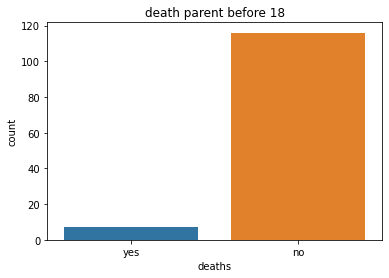

In [136]:
df1['S1Q2K'] = df1['S1Q2K'].astype('category')
df1['S1Q2K'] = df1['S1Q2K'].cat.rename_categories(["yes","no"])
sns.countplot(x='S1Q2K', data=df1)
plt.xlabel('deaths')
plt.title('death parent before 18')
plt.show()

DRANK ALCOHOL TO IMPROVE MOOD IN LAST 12 MONTHS?

In [137]:
# alchool to improve mood users
df1['ALC4MOOD'].value_counts(dropna=True)#102 Nan values deleted

2.000000    19
1.000000     3
Name: ALC4MOOD, dtype: int64

In [138]:
impr_mood_per=df1.groupby('ALC4MOOD').size() * 100 / len(df1)
impr_mood_per

ALC4MOOD
1.000000    2.419355
2.000000   15.322581
dtype: float64

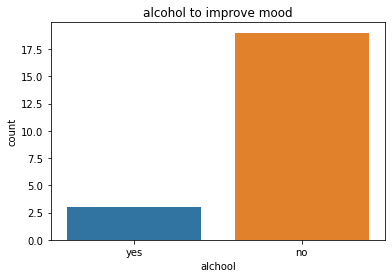

In [139]:
df1['ALC4MOOD'] = df1['ALC4MOOD'].astype('category')
df1['ALC4MOOD'] = df1['ALC4MOOD'].cat.rename_categories(["yes","no"])
sns.countplot(x='ALC4MOOD', data=df1)
plt.xlabel('alchool')
plt.title('alcohol to improve mood')
plt.show()

DRINKING STATUS?

In [140]:
# total alohol drinkers under 18 years old
df1['CONSUMER'].value_counts(dropna=True)

1    59
3    55
2    10
Name: CONSUMER, dtype: int64

In [141]:
consumr_per=df1.groupby('CONSUMER').size() * 100 / len(df1)
consumr_per


CONSUMER
1   47.580645
2    8.064516
3   44.354839
dtype: float64

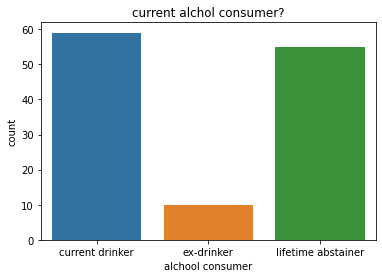

In [142]:
df1['CONSUMER'] = df1['CONSUMER'].astype('category')
df1['CONSUMER'] = df1['CONSUMER'].cat.rename_categories(["current drinker","ex-drinker","lifetime abstainer"])
sns.countplot(x='CONSUMER', data=df1)
plt.xlabel('alchool consumer')
plt.title('current alchol consumer?')
plt.show()

HOW OFTEN DRANK LARGEST NUMBER OF DRINKS OF ANY ALCOHOL IN LAST 12 MONTHS?

In [143]:
#quantity of alchol in a timeframe
df1['ALCL_12MO'].value_counts(dropna=True) #69 Nan values deleted

4.000000    48
3.000000     8
2.000000     2
Name: ALCL_12MO, dtype: int64

In [144]:
df1.groupby('ALCL_12MO').size() * 100 / len(df1)

ALCL_12MO
2.000000    1.612903
3.000000    6.451613
4.000000   38.709677
dtype: float64

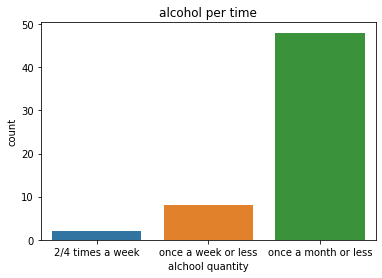

In [145]:
df1['ALCL_12MO'] = df1['ALCL_12MO'].astype('category')
df1['ALCL_12MO'] = df1['ALCL_12MO'].cat.rename_categories(["2/4 times a week","once a week or less","once a month or less"])
sns.countplot(x='ALCL_12MO', data=df1)
plt.xlabel('alchool quantity')
plt.title('alcohol per time')
plt.show()

Firstly, a new 2 variables called ‘subset1’ and 'subset2'  was necessary to be created in order to divide the partecipants, then i dropped Na and unkown information so this could cause some different resulte in this project, In addition i changed the variable name['S4AQ20B'] in ['ALC4MOOD'] and ['S2AQ8D'] in ['ALCL_12MO'] finally i I have related the subset 1(parents died before child has 18) with 'current drinkers' variable and we can ntice that (in a really small quantity)  the death of parents before 18 can affect the child and he could be a drinker.On the other side children in the subset two we can notice a high percentage of lifetime absatiner and current drinkers.

In [146]:
#def a functioninorder to 
def ALCOHOLDIST (row):
    if row['ALC4MOOD'] ==1 :
        return 5
    if row['ALCL_12MO'] == 1 :
        return 1
    if row['ALCL_12MO'] == 2 :
        return 2
    if row['ALCL_12MO'] == 3 :
        return 3
    if row['ALCL_12MO'] == 4 :
        return 4

In [147]:
subset1['ALC4MOOD'] = subset1['ALC4MOOD'].astype(float)
subset1['ALCL_12MO'] = subset1['ALCL_12MO'].astype(float)

In [148]:
subset2['ALC4MOOD'] = subset2['ALC4MOOD'].astype(float)
subset2['ALCL_12MO'] = subset2['ALCL_12MO'].astype(float)

In [149]:
#relation between  childresns with dead parents before 18 and if they are current alcohol drinkers
relation1= df1.groupby('TROUBLS').size()
relation1

TROUBLS
1.000000      6
2.000000    111
9.000000      7
dtype: int64

In [150]:
#percentage of alchool consumer with dad parents
relation1p=subset1.groupby('TROUBLS').size() * 100 / len(subset1)
relation1p

TROUBLS
1.000000   14.285714
2.000000   71.428571
9.000000   14.285714
dtype: float64

In [151]:
#relation between  childresns with no dead parents before 18 and if they are current alcohol drinkers
relation2=subset2.groupby('CONSUMER').size()
relation2

CONSUMER
1    55
2     8
3    53
dtype: int64

In [152]:
#percentage of alchool consumer with no dead parents
relation2p=subset2.groupby('CONSUMER').size() * 100 / len(subset2)
relation2p

CONSUMER
1   47.413793
2    6.896552
3   45.689655
dtype: float64

In [153]:
subset2.dtypes

S1Q2K        float64
SEX            int64
ALC4MOOD     float64
CONSUMER       int64
ALCL_12MO    float64
TROUBLS      float64
dtype: object

In [154]:
subset1['ALCOHOLDIST'] = subset1.apply (lambda row: ALCOHOLDIST (row), axis=1)
subsetfin1 =subset1[['S1Q2K','ALCL_12MO', 'ALC4MOOD','ALCOHOLDIST']].copy()
subsetfin1.style.set_precision(0)


,S1Q2K,ALCL_12MO,ALC4MOOD,ALCOHOLDIST
945,1,4,2,4
3540,1,nan,nan,nan
4747,1,4,nan,4
4867,1,nan,nan,nan
5629,1,nan,nan,nan
6560,1,4,2,4
7193,1,nan,nan,nan


In [155]:
subset2['ALCOHOLDIST'] = subset2.apply (lambda row: ALCOHOLDIST (row), axis=1)
subsetfin2 =subset2[['S1Q2K','ALCL_12MO', 'ALC4MOOD','ALCOHOLDIST']].copy()
subsetfin2.style.set_precision(0)


,S1Q2K,ALCL_12MO,ALC4MOOD,ALCOHOLDIST
3,2,nan,nan,nan
9,2,4,nan,4
36,2,nan,nan,nan
153,2,nan,nan,nan
156,2,nan,nan,nan
187,2,4,nan,4
210,2,nan,nan,nan
357,2,4,nan,4
365,2,4,nan,4
398,2,4,nan,4


In [156]:
finl_prcntg1=subsetfin1.groupby('ALCOHOLDIST').size() * 100 / len(subset1)
finl_prcntg1

ALCOHOLDIST
4.000000   42.857143
dtype: float64

In [157]:
finl_prcntg2=subsetfin2.groupby('ALCOHOLDIST').size() * 100 / len(subset2)
finl_prcntg2

ALCOHOLDIST
2.000000    1.724138
3.000000    6.896552
4.000000   35.344828
5.000000    2.586207
dtype: float64

In the bar chart above we can see the relationship between quantity of alchool drunk in the past 12 month by a child with dead parents, and the gender.we can see that people who drank alcohol once a month or less used to be men.

In [158]:
subset3=df1[['S1Q2K','ALCL_12MO','SEX','ALC4MOOD','TROUBLS']].copy()
subset3

,S1Q2K,ALCL_12MO,SEX,ALC4MOOD,TROUBLS
3,no,NaN,1,NaN,2.000000
9,no,once a month or less,2,NaN,2.000000
36,no,NaN,1,NaN,2.000000
153,no,NaN,2,NaN,2.000000
156,no,NaN,1,NaN,2.000000
...,...,...,...,...,...
7914,no,once a month or less,2,NaN,2.000000
7950,no,once a month or less,1,NaN,2.000000
8032,no,NaN,1,NaN,2.000000
8086,no,once a month or less,1,NaN,2.000000


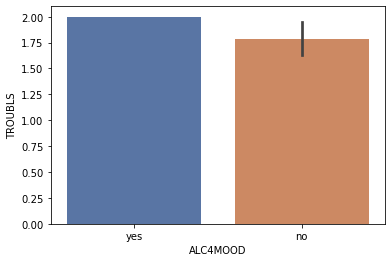

In [159]:

sns.set_color_codes("pastel")
sns.barplot(x="ALC4MOOD", y="TROUBLS", data=subset3 ,palette='deep',
            label="Total", color="b")


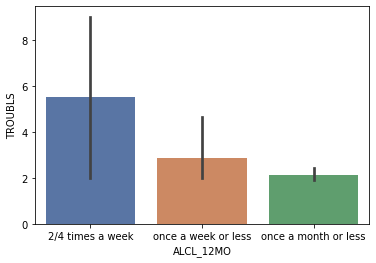

In [160]:
sns.set_color_codes("pastel")
sns.barplot(x="ALCL_12MO", y="TROUBLS", data=df1,palette="deep",
            label="Total", color="k")


##### CONCLUSION

Finally with all of those observation we can conclude that the new variable ['ALCOHOLDIST'] related with both of the subsets, childrens whose have experienced the death of a family member(parents) ['S1Q2K'] and quantity of alcohol. the 42.8% drank only between 1-6 times during the past 12 months. Now with the other subset n.2 childrens with no death of any family member just 1.7 % drank between 2 and 4 times a week, and 6.8% use to drink between 1 and 3 times a month and the bigger part 35.3% of the partecipants use to drink just between 1 to 11 times a year.No correlation with subset1 and the variable ['ALC4MOOD'] alchool to improve mood, and just a small percentage of 2.5 in the subset2.
we can also conclude that the relation between the use of alcohol for improve mood['ALCOOL4MOOD'] and get in troubles ['TROUBLS'] at school or at home it's more pronounced for people who use alcohol for fun, and we can appreciate in the last graphic that those who drink less ['ALCL_12MO']  make himself in trouble more easily.['TROUBLS'].

##### LIMITATIONS

we need to take into account that this project has a lot of miss values so this could impact the final result.